# 11과 이변량분석 종합실습

## 환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

# 1.숫자형 Y : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 지역 주민 평균 교육수준(범주: 11~17)	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,11,276,120,Bad,42,Yes
1,11.22,111,16,260,83,Good,65,Yes
2,10.06,113,10,269,80,Medium,59,Yes
3,7.40,117,4,466,97,Medium,55,Yes
4,4.15,141,3,340,128,Bad,38,No


In [3]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

In [7]:
data.isnull().sum()

Sales          0
CompPrice      0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
US             0
dtype: int64

#### ① Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

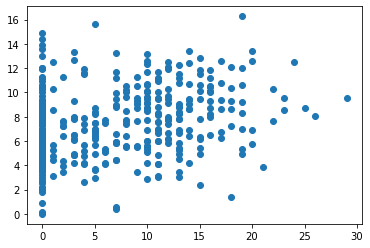

In [8]:
plt.scatter('Advertising','Sales',data=data)
plt.show()

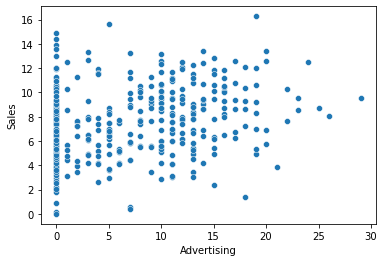

In [10]:
sns.scatterplot(x='Advertising',y='Sales',data=data)
plt.show()

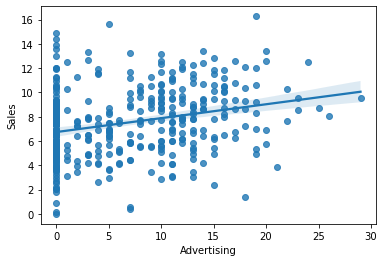

In [40]:
sns.regplot(x='Advertising',y=target,data=data)
plt.show()

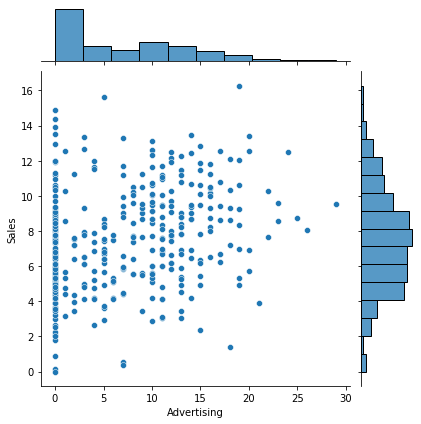

In [12]:
sns.jointplot(x='Advertising',y='Sales',data=data)
plt.show()

2) 수치화 : 상관분석

In [14]:
spst.pearsonr(data['Advertising'],data['Sales'])

(0.269506781376902, 4.377677110302732e-08)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

약한 양의 상관관계를 가지고 있다.
광고금액이 적어도 팔리는 수가 많은 것을 보니 광고가 안되는 지역이라고 판단된다..
너무 많은 광고는 판매에 도움이 되지 않는다.
보통 8000개 정도가 팔린다.

#### ② Population -> Sales

1) 시각화 : scatter(regplot), jointplot

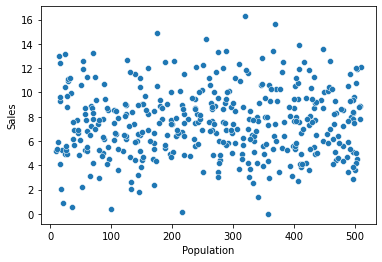

In [17]:
sns.scatterplot(x='Population',y='Sales',data=data)
plt.show()

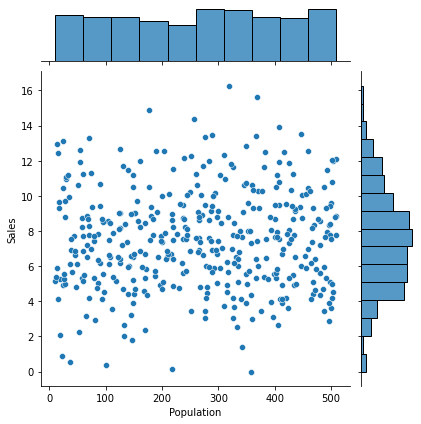

In [19]:
sns.jointplot(x='Population',y='Sales',data=data)
plt.show()

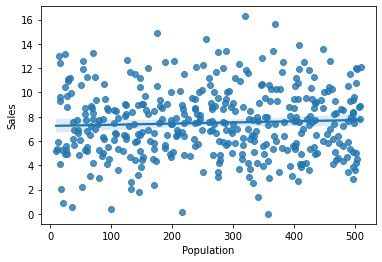

In [41]:
sns.regplot(x='Population',y=target,data=data)
plt.show()
# regplot 직선이 보이게됨

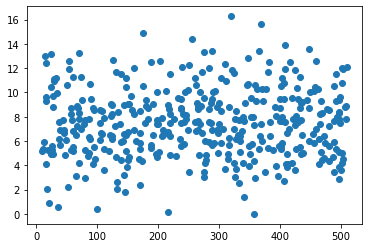

In [20]:
plt.scatter('Population','Sales',data=data)
plt.show()

2) 수치화 : 상관분석

In [18]:
spst.pearsonr(data['Population'],data['Sales'])

(0.0504709844720392, 0.31398160931903)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

#### ③ Price -> Sales

1) 시각화 : scatter(regplot), jointplot

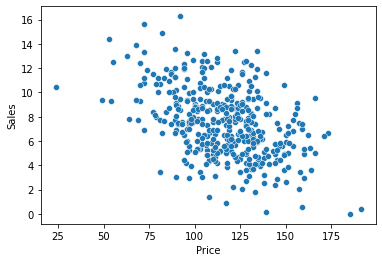

In [21]:
sns.scatterplot(x='Price',y='Sales',data=data)
plt.show()

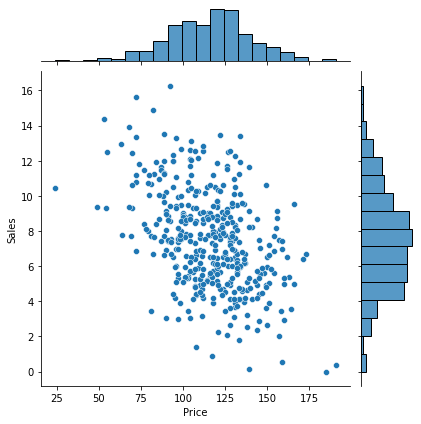

In [22]:
sns.jointplot(x='Price',y='Sales',data=data)
plt.show()

2) 수치화 : 상관분석

In [23]:
spst.pearsonr(data['Price'],data['Sales'])

(-0.4449507278465726, 7.61818701191294e-21)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

음의 상관관계를 가지고 있으며 100~150달러대에 사람들이 구매를 많이하는 모습이 보인다.

#### ④ Age -> Sales

1) 시각화 : scatter(regplot), jointplot

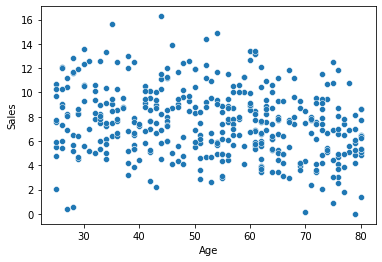

In [25]:
sns.scatterplot(x='Age',y='Sales',data=data)
plt.show()

[]

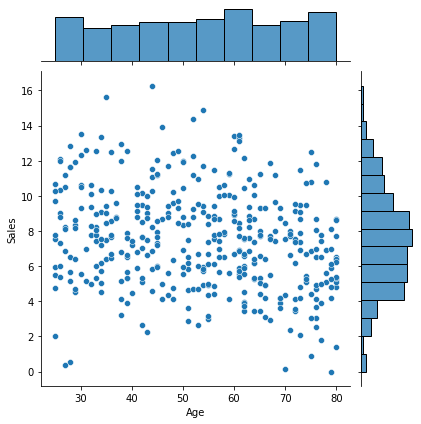

In [27]:
sns.jointplot(x='Age',y='Sales',data=data)
plt.plot()

2) 수치화 : 상관분석

In [28]:
spst.pearsonr(data['Age'],data['Sales'])

(-0.2318154396045765, 2.7889498393711916e-06)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

연령대(평균연령이 높아질 수록 판매량이 낮아진다.) 그러나 강하지 않다.
연령층에 대해서는 다 큰 차이를 보이지는 않으나 2~30대,60대,70대에서 수요를 많이 보이는 것으로 보인다. 2~30대는 아이에게, 60~70대는 손주를 위해 구매하는 것으로 보인다.
약한 음의 상관관계를 가지고 있다고 하나 상관관계의 신뢰도가 이번에는 떨어져보인다.

#### ⑤ CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

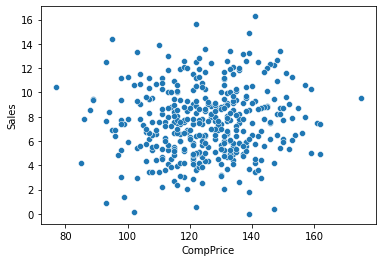

In [29]:
sns.scatterplot(x='CompPrice',y='Sales',data=data)
plt.show()

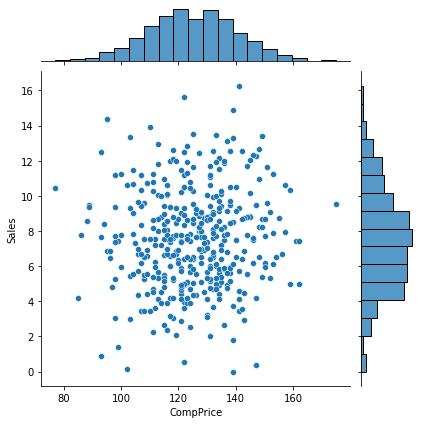

In [30]:
sns.jointplot(x='CompPrice',y='Sales',data=data)
plt.show()

2) 수치화 : 상관분석

In [32]:
spst.pearsonr(data['CompPrice'],data['Sales'])

(0.06407872955062152, 0.2009398289418295)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

관련되어 있을 가능성이 매우 적다.
왜?

- 가격 경쟁력 변수 추가~!!!

In [43]:
data['Price_diff'] = data['CompPrice'] - data['Price']

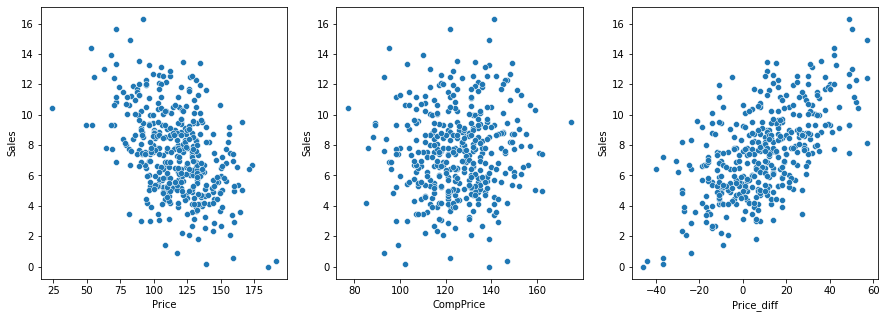

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x='Price',y= target,data=data)
plt.subplot(1,3,2)
sns.scatterplot(x='CompPrice',y= target,data=data)
plt.subplot(1,3,3)
sns.scatterplot(x='Price_diff',y= target,data=data)
plt.show()

In [48]:
spst.pearsonr(data['Price'],data[target])

(-0.4449507278465726, 7.61818701191294e-21)

In [49]:
spst.pearsonr(data['CompPrice'],data[target])

(0.06407872955062152, 0.2009398289418295)

In [47]:
spst.pearsonr(data['Price_diff'],data[target])
# 상관관계가 꽤나 오름

(0.5979217124533921, 3.877120641788835e-40)

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### ① ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

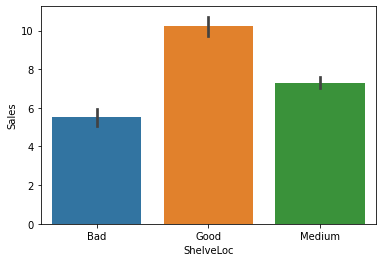

In [33]:
sns.barplot(x='ShelveLoc',y='Sales',data=data)
plt.show()

2) 수치화 : t-test, anova

In [35]:
S_1 = data.loc[data.ShelveLoc == 'Bad','Sales']
S_2 = data.loc[data.ShelveLoc == 'Good','Sales']
S_3 = data.loc[data.ShelveLoc == 'Medium','Sales']
spst.f_oneway(S_1,S_2,S_3)

F_onewayResult(statistic=92.22990509910346, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

만족도가 대체로 좋고, 만족도가 높을 수록 구매가 많아지는 모습을 보인다. 

#### ② US-> Sales

1) 시각화 : 평균비교 barplot

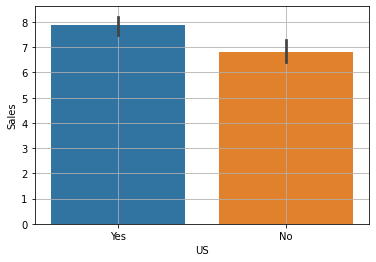

In [50]:
sns.barplot(x='US',y='Sales',data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [38]:
Yes = data.loc[data['US'] == 'Yes','Sales']
No = data.loc[data['US'] == 'No','Sales']
spst.ttest_ind(Yes,No)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

지역은 크게 상관관계가 없는 것으로 확인이 된다.

### (3) 관계 정리하기

① 강한관계

In [ ]:
shelveloc,price_diff

② 중간관계

In [ ]:
advertising,price,age,us

③ 관계없음

In [ ]:
compprice,population

# 2.범주형 Y

## 1.1 타이타닉 탑승객 데이터 : 기본

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [3]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
target = 'Survived'

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Survived

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
temp2 = titanic.loc[titanic['Age'].notnull()]

In [13]:
temp2['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [15]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [11]:
temp2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1) 그래프 : histogram, densityplot

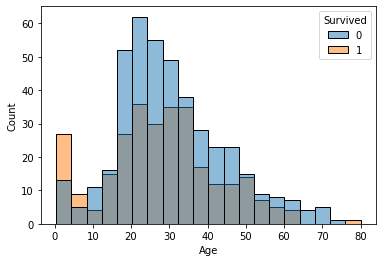

In [8]:
sns.histplot(x='Age',data=temp2,hue='Survived')
plt.show()

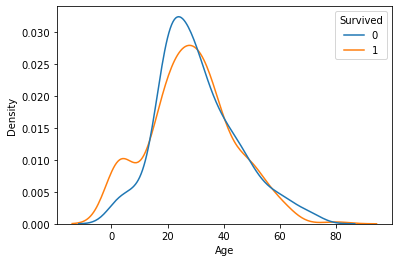

In [9]:
sns.kdeplot(x='Age',data=temp2,hue='Survived',common_norm=False)
plt.show()

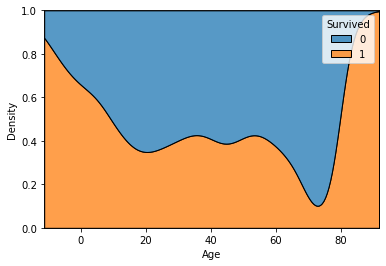

In [10]:
sns.kdeplot(x='Age',data=temp2,hue='Survived',multiple='fill')
plt.show()

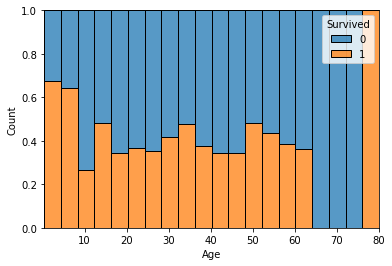

In [12]:
sns.histplot(x='Age',data=temp2,hue='Survived',multiple='fill')
plt.show()

2) 수치화 : 로지스틱회귀

In [16]:
model = sm.Logit(temp2['Survived'], temp2['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.672504
         Iterations 4
Age    9.909841e-08
dtype: float64


3) 관계 평가하기

In [ ]:
강한 상관관계를 가지고 있다. 

4) 추가 분석할 내용 정리

#### ② Fare --> Survived

In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1) 그래프 : histogram, densityplot

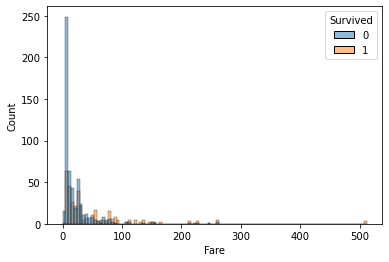

In [16]:
sns.histplot(x='Fare',data=titanic,hue='Survived')
plt.show()

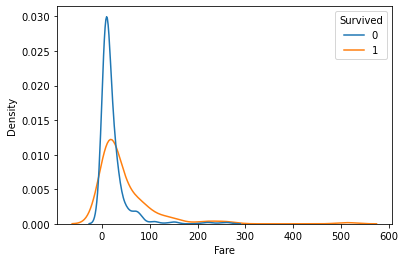

In [17]:
sns.kdeplot(x='Fare',data=titanic,hue='Survived',common_norm=False)
plt.show()

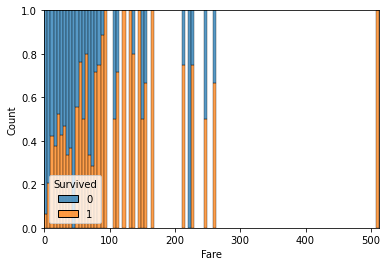

In [18]:
sns.histplot(x='Fare',data=titanic,hue='Survived',multiple='fill')
plt.show()

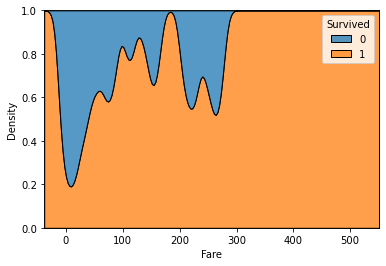

In [19]:
sns.kdeplot(x='Fare',data=titanic,hue='Survived',multiple='fill')
plt.show()

2) 수치화 : 로지스틱회귀

In [20]:
model = sm.Logit(titanic['Survived'], titanic['Fare'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
Fare    0.014925
dtype: float64


3) 관계 평가하기

In [ ]:
강한 관계가 있다. 요금이 높을 수록 생존을 했다.

4) 추가 분석할 내용 정리

In [ ]:
요금과 생존의 상관관계에서 나이도 상관관계가 존재할 수 있지 않을까?

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① Sex --> Survived

In [18]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1) 교차표(pd.crosstab())

In [21]:
pd.crosstab(titanic['Sex'],titanic['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


2) 시각화( Stacked Bar, Mosaic)

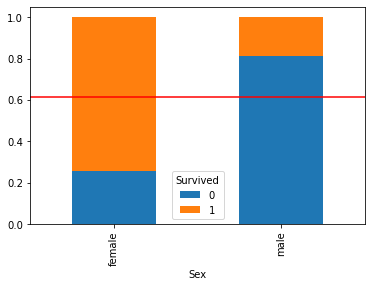

In [23]:
temp = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(),color='r')
plt.show()

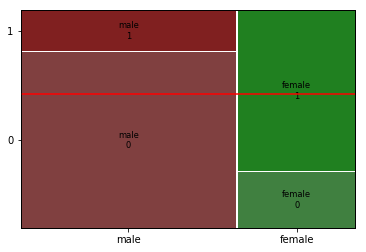

In [24]:
mosaic(titanic,['Sex','Survived'])
plt.axhline(1-titanic['Survived'].mean(),color='r')
plt.show()

3) 가설검정(카이제곱검정)

In [26]:
table = pd.crosstab(titanic['Survived'], titanic['Sex'])
result = spst.chi2_contingency(table)
result

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 355.52525253],
        [120.52525253, 221.47474747]]))

4) 관계 평가하기

In [ ]:
관계가 있다 먼저 여성을 구출하려고 하지 않았을까?

5) 추가 분석하기

In [ ]:
여성을 먼저 구출하고나서 남성 중 어떤 연령층이 많이 생존했을까?

#### ② Pclass --> Survived

In [19]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1) 교차표(pd.crosstab())

In [27]:
pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


2) 시각화( Stacked Bar, Mosaic)

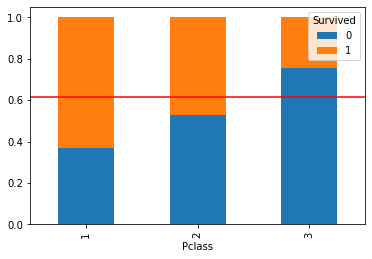

In [28]:
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(),color='r')
plt.show()

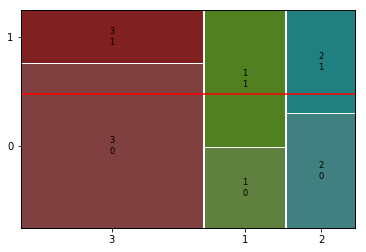

In [29]:
mosaic(titanic,['Pclass','Survived'])
plt.axhline(1-titanic['Survived'].mean(),color='r')
plt.show()

3) 가설검정(카이제곱검정)

In [30]:
table = pd.crosstab(titanic['Survived'],titanic['Pclass'])
result = spst.chi2_contingency(table)
result

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909, 113.37373737, 302.53535354],
        [ 82.90909091,  70.62626263, 188.46464646]]))

4) 관계 평가하기

In [ ]:
1등급 객실의 승객이 가장 많이 구출되었고, 3등급 객실의 인원이 적게 구출되었다

5) 추가 분석하기

In [ ]:
1등급 객실에 있는 승객 중 사망한 승객은 어떤 성별, 나이를 가지고 있을까?

#### ③ Embarked --> Survived

In [20]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
temp3 = titanic.loc[titanic['Embarked'].notnull()]

In [22]:
temp3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

1) 교차표(pd.crosstab())

In [25]:
pd.crosstab(temp3['Embarked'],temp3['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


2) 시각화( Stacked Bar, Mosaic)

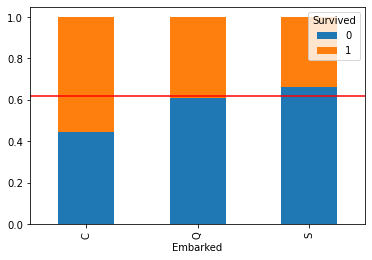

In [26]:
temp = pd.crosstab(temp3['Embarked'],temp3['Survived'],normalize='index')
temp.plot.bar(stacked=True)
plt.axhline(1-temp3['Survived'].mean(),color='r')
plt.show()

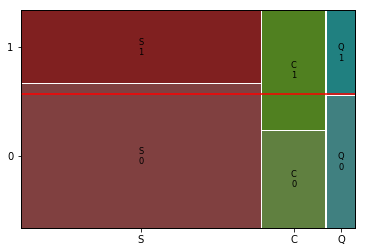

In [27]:
mosaic(temp3,['Embarked','Survived'])
plt.axhline(1-temp3['Survived'].mean(),color='r')
plt.show()

3) 가설검정(카이제곱검정)

In [30]:
table = pd.crosstab(temp3['Survived'],temp3['Embarked'])
result = spst.chi2_contingency(table)
result

(26.48914983923762,
 1.769922284120912e-06,
 2,
 array([[103.7480315,  47.5511811, 397.7007874],
        [ 64.2519685,  29.4488189, 246.2992126]]))

4) 관계 평가하기

In [ ]:
강한 관계가 있다.

5) 추가 분석하기

### (3) 관계 정리하기

① 강한관계

② 중간관계

③ 관계없음